In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

## Lectura de la información

In [48]:
stop_words = pd.read_csv("information/stop_words.csv")
stop_words.head()

,stop_words;
0,a
1,actualmente
2,adelante
3,además
4,afirmó


In [6]:
sentiment_text = pd.read_csv("information/sentiment_analysis_dataset.csv")
sentiment_text.head()

,user,text,date,emotion,sentiment
0,@erreborda,termine bien abrumado después de hoy,"Jan 6, 2024 · 2:53 AM UTC",overwhelmed,scared
1,@shpiderduck,me siento abrumado,"Jan 6, 2024 · 2:35 AM UTC",overwhelmed,scared
2,@Alex_R_art,Me siento un poco abrumado por la cantidad de ...,"Jan 6, 2024 · 12:20 AM UTC",overwhelmed,scared
3,@anggelinaa97,Salvador la única persona que no la ha abrumad...,"Jan 5, 2024 · 10:38 PM UTC",overwhelmed,scared
4,@diegoreyesvqz,Denme un helado o algo que ando full abrumado.,"Jan 5, 2024 · 8:38 PM UTC",overwhelmed,scared


In [10]:
sentiment_text['emotion'] = sentiment_text['emotion'].astype('category')
sentiment_text['sentiment'] = sentiment_text['sentiment'].astype('category')
sentiment_text.dtypes

user           object
text           object
date           object
emotion      category
sentiment    category
dtype: object

### Entendiendo los datos

In [39]:
sentiment_text.shape

(2590, 5)

In [11]:
sentiment_text.describe()

,user,text,date,emotion,sentiment
count,2590,2590,2590,2590,2590
unique,2083,2191,949,20,6
top,@Yaramsi3,"Para entender el mundo, lee. Para entenderte ...","Jan 6, 2024 · 3:38 AM UTC",thankful,peaceful
freq,12,6,25,150,660


<Axes: xlabel='sentiment', ylabel='Count'>

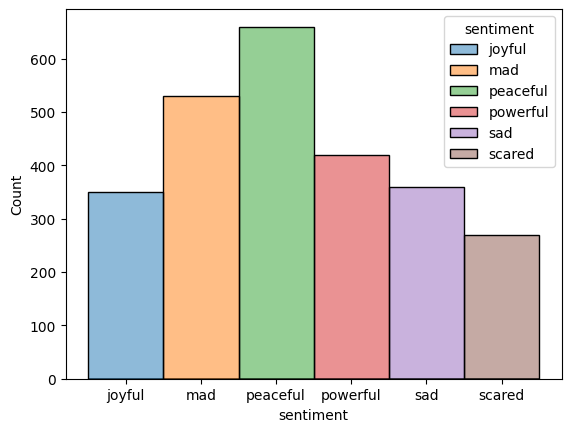

In [21]:
sns.histplot(sentiment_text, x="sentiment", hue="sentiment")

In [40]:
counter_general = {}
for sentiment in sentiment_text['emotion']:
    if(counter_general.get(sentiment) == None):
        counter_general[sentiment] = 0
    counter_general[sentiment] = counter_general[sentiment] + 1

print(counter_general)

{'overwhelmed': 140, 'embarrassed': 130, 'jealous': 140, 'irritated': 140, 'frustrated': 120, 'distant': 130, 'stupid': 90, 'isolated': 120, 'sleepy': 150, 'responsive': 110, 'relaxed': 130, 'loving': 130, 'thankful': 150, 'secure': 140, 'confident': 140, 'successful': 140, 'surprised': 140, 'playful': 130, 'optimistic': 110, 'daring': 110}


In [34]:
counter_general.get("ddf") == None

True

### Estandarizando la información

In [45]:
sentiment_text['text'] = sentiment_text['text'].apply(str.lower)
sentiment_text.head()

,user,text,date,emotion,sentiment
0,@erreborda,termine bien abrumado después de hoy,"Jan 6, 2024 · 2:53 AM UTC",overwhelmed,scared
1,@shpiderduck,me siento abrumado,"Jan 6, 2024 · 2:35 AM UTC",overwhelmed,scared
2,@Alex_R_art,me siento un poco abrumado por la cantidad de ...,"Jan 6, 2024 · 12:20 AM UTC",overwhelmed,scared
3,@anggelinaa97,salvador la única persona que no la ha abrumad...,"Jan 5, 2024 · 10:38 PM UTC",overwhelmed,scared
4,@diegoreyesvqz,denme un helado o algo que ando full abrumado.,"Jan 5, 2024 · 8:38 PM UTC",overwhelmed,scared
